##<font color='Blue'>**Dados do pinguim do Arquipélago de Palmer (Antártida)** </font>

#### <font color='GRAY'> **1° Entender o Problema de Negócio**  </font>
Analise exploratoria dos dataset: Dados do pinguim do Arquipélago de Palmer (Antártida)

Dados obtidos do Kaggle: https://www.kaggle.com/datasets/larsen0966/penguins?select=penguins.csv

In [164]:
# Instalando o pacote para gerar as versões dos pacotes usados
!pip install -q -U watermark

In [165]:
# Bibliotecas
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ignorando alertas
import warnings
warnings.filterwarnings("ignore")

# Manter os gráficos nessa pagina
%matplotlib inline

##### *Carregar a base de dados originais*

In [166]:
# Carregando a base de dados originais
df = pd.read_csv('/content/penguins_lter.csv')

In [167]:
# Visualizando as 5 primeiras lindas da base de dados
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


#### Descrição das Varáveis  → *Entendendo os nosso Dados*

In [168]:
# Verifcando o tamanho do DataFrame
df.shape

(344, 17)

##### *Carregar ou conectar a base de dados simplificados*

In [169]:
# Carregando a base de dados simplificada
df1 = pd.read_csv('/content/penguins_size.csv')

### <font color='GRAY'> **2° Fazer Análise Exploratória dos Dados**   </font>

In [170]:
# Verifcando o tamanho do DataFrame
df1.shape

(344, 7)

In [171]:
# Visualizando as 5 primeiras lindas da base de dados
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [172]:
# Visualizando as 5 primeiras lindas da base de dados
df1.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE



- **Descrição das Variáveis**


1. **Species**: espécies de pinguins (chinstrap, Adélie ou Gentoo)
2. **Culmen_length_mm**: comprimento do culmen (mm)
3. **Culmen_depth_mm**: profundidade do culmen (mm)
4. **Flipper_length_mm**: comprimento da palheta (mm)
5. **Body_mass_g**: massa corporal (g)
6. **Island**: nome da ilha (Dream, Torgersen ou Biscoe) no Arquipélago de Palmer (Antártida)
7. **Sex**: sexo de pinguim

penguins_lter.csv : dados originais combinados para 3 espécies de pinguins (agregados de links individuais abaixo)

Conheça os pinguins:


O que são comprimento e profundidade do culmen?
O culmen é "a crista superior do bico de um pássaro" (definição da Oxford Languages).

Para esses dados de pinguim, o comprimento do culmen e a profundidade do culmen são medidos conforme mostrado abaixo (obrigado Kristen Gorman por esclarecer!):

In [173]:
# Verificando as informações
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [174]:
df1.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

#### *Verificando valores ausentes*

In [175]:
df1.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [176]:
VF = (((df1.isna().sum().sum())/344)*100).round(2)
print("Porcentagem de valores faltantes:", VF,'%')

Porcentagem de valores faltantes: 5.23 %


In [177]:
# Dados faltantes
for col in df1.columns:
  perc=np.mean(df1[col].isna())
  print(f'{col}:{(perc*100).round(3)} %')

species:0.0 %
island:0.0 %
culmen_length_mm:0.581 %
culmen_depth_mm:0.581 %
flipper_length_mm:0.581 %
body_mass_g:0.581 %
sex:2.907 %


In [178]:
# Verificando se ha valores duplicados

df1.duplicated().sum()

0

In [179]:
# Exculindo valores nulos
df2 = df1.dropna()

In [180]:
# Verificano valores nulos
df2.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [181]:
VF1 = (((df2.isna().sum().sum())/344)*100).round(2)
print("Porcentagem de valores faltantes:", VF1,'%')

Porcentagem de valores faltantes: 0.0 %


####Varicando a distribuição dos dados categoricos

In [182]:
# Distribuição dos dados categoricos
df2.select_dtypes(include= "object").describe()

,species,island,sex
count,334,334,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,146,164,168


####Verificando valores em cada coluna

In [183]:
# Valores das especies
df2['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [184]:
# Valores das especies
df2.species.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [185]:
# Valores das ilha
df2['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [186]:
# Valores das ilhas
df2.island.value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [187]:
# Valores dos sexos
df2['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [188]:
# Valores dos sexos
df2.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [189]:
# Visuaizando linha com sex igual a .(ponto)
df2[df2['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [190]:
# Exculindo linha 336
df3 = df2.drop(336)

In [191]:
df3.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [192]:
df3.select_dtypes(include= "object").describe()

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,146,163,168


In [193]:
# Analise Matematica - ESTATISTICA DESCRITIVA
df3.describe().round(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.00,333.00,333.00,333.00
mean,43.99,17.16,200.97,4207.06
std,5.47,1.97,14.02,805.22
min,32.10,13.10,172.00,2700.00
25%,39.50,15.60,190.00,3550.00
50%,44.50,17.30,197.00,4050.00
75%,48.60,18.70,213.00,4775.00
max,59.60,21.50,231.00,6300.00


In [194]:
# Porcentagem dos dasos a serem estudados

porc = (((333/344)*100))
print('Porcentagem dos dados a serem estudados:', porc,'%')


Porcentagem dos dados a serem estudados: 96.80232558139535 %


## Associação de variaveis

In [195]:
df3.head(1)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE


**Analisando a variavel PESO**

In [196]:
# Média de peso por Sexo
df3.groupby('sex')['body_mass_g'].mean().round(2)

sex
FEMALE    3862.27
MALE      4545.68
Name: body_mass_g, dtype: float64

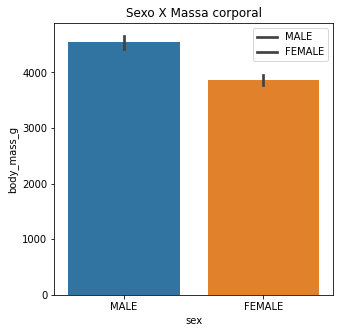

In [197]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='body_mass_g', data=df3)
plt.legend(df3.sex.value_counts().index)
plt.title('Sexo X Massa corporal')
plt.show()

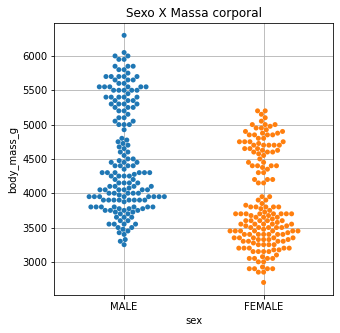

In [198]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='sex', y='body_mass_g', data=df3)
plt.title('Sexo X Massa corporal')
plt.grid()
plt.show()

**Conclusão:** Os machos tem massa corporal maior do que as femeas.

In [199]:
# Média de peso por especie
df3.groupby('species')['body_mass_g'].mean().round(2)

species
Adelie       3706.16
Chinstrap    3733.09
Gentoo       5092.44
Name: body_mass_g, dtype: float64

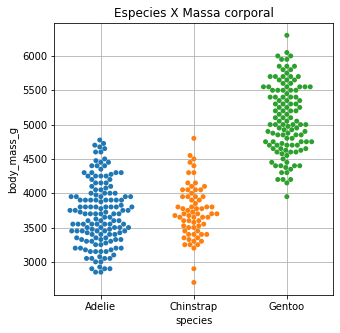

In [200]:
### Associando as variaveis peso por especie
# Gráfico
plt.figure(figsize=(5,5))
sns.swarmplot(x='species', y='body_mass_g', data=df3)
plt.title('Especies X Massa corporal')
plt.grid()
plt.show()

**Conclusão:** Os pinguins da especie Gentoo tem maior massa corporal podendo ser os maiores da pesquisa.

In [201]:
# Média de peso por ilha
df3.groupby('island')['body_mass_g'].mean().round(2)

island
Biscoe       4719.17
Dream        3718.90
Torgersen    3708.51
Name: body_mass_g, dtype: float64

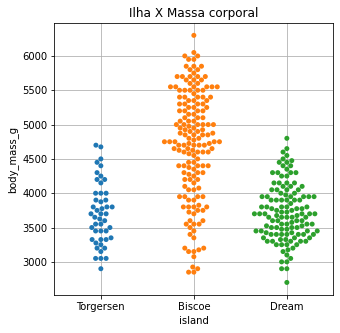

In [202]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='island', y='body_mass_g', data=df3)
plt.title('Ilha X Massa corporal')
plt.grid()
plt.show()

**Conclusão:** Na ilha Biscoe ficam os piguins de maior massa corporal.

**Analisa a variavel FLIPPER**

In [203]:
# Média de tamanho do flipper por Sexo
df3.groupby('sex')['flipper_length_mm'].mean().round(2)

sex
FEMALE    197.36
MALE      204.51
Name: flipper_length_mm, dtype: float64

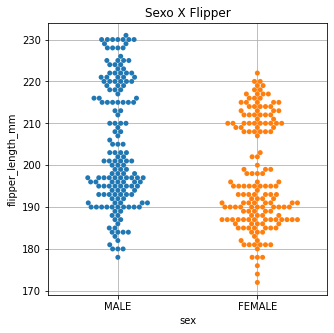

In [204]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='sex', y='flipper_length_mm', data=df3)
plt.title('Sexo X Flipper')
plt.grid()
plt.show()

**Conclusão:** Os pinguins machos tem maior comprimento de flipper.

In [205]:
# Média de tamanho do flipper por especie
df3.groupby('species')['flipper_length_mm'].mean().round(2)

species
Adelie       190.10
Chinstrap    195.82
Gentoo       217.24
Name: flipper_length_mm, dtype: float64

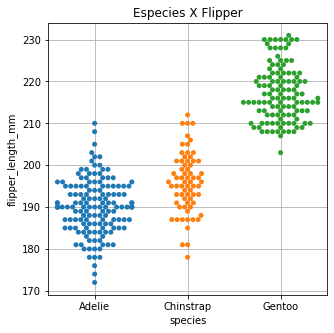

In [206]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='species', y='flipper_length_mm', data=df3)
plt.title('Especies X Flipper')
plt.grid()
plt.show()

**Conclusão:** Os pinguins da especie Gentoo tem maior comprimento de flippers.

In [207]:
# Média de tamanho do flipper por ilha
df3.groupby('island')['flipper_length_mm'].mean().round(2)

island
Biscoe       209.56
Dream        193.19
Torgersen    191.53
Name: flipper_length_mm, dtype: float64

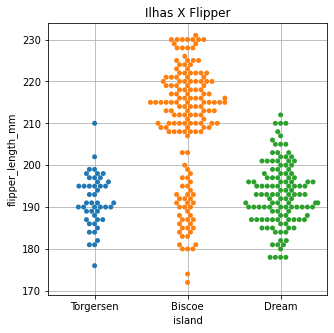

In [208]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='island', y='flipper_length_mm', data=df3)
plt.title('Ilhas X Flipper')
plt.grid()
plt.show()

**Analisando PROFUNDIDADE DO CULMEN**

In [209]:
# Média de profundidade do culmen por Sexo
df3.groupby('sex')['culmen_depth_mm'].mean().round(2)

sex
FEMALE    16.43
MALE      17.89
Name: culmen_depth_mm, dtype: float64

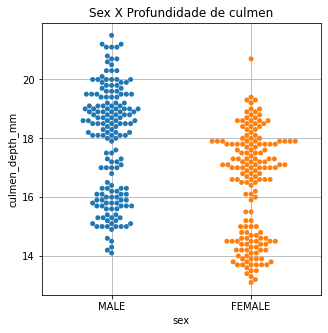

In [210]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='sex', y='culmen_depth_mm', data=df3)
plt.title('Sex X Profundidade de culmen')
plt.grid()
plt.show()

In [211]:
# Média de profundidade do culmen por specie
df3.groupby('species')['culmen_depth_mm'].mean().round(2)

species
Adelie       18.35
Chinstrap    18.42
Gentoo       15.00
Name: culmen_depth_mm, dtype: float64

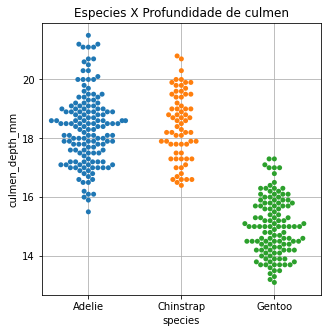

In [212]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='species', y='culmen_depth_mm', data=df3)
plt.title('Especies X Profundidade de culmen')
plt.grid()
plt.show()

**Conclusão:** Os pinguins da especie Gentoo tem menor profundidade do cumen mesmo sendo os maiores pesquisados.

In [213]:
# Média de profundidade do culmen por island
df3.groupby('island')['culmen_depth_mm'].mean().round(2)

island
Biscoe       15.91
Dream        18.34
Torgersen    18.45
Name: culmen_depth_mm, dtype: float64

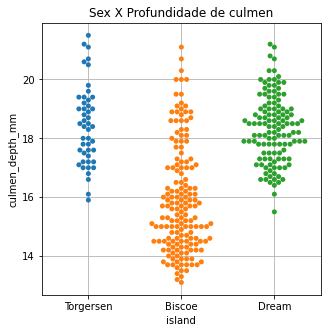

In [214]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='island', y='culmen_depth_mm', data=df3)
plt.title('Sex X Profundidade de culmen')
plt.grid()
plt.show()

**TAMANHO DO CULMEN**

In [215]:
# Média de tamanho do culmen por Sexo
df3.groupby('sex')['culmen_length_mm'].mean().round(2)

sex
FEMALE    42.10
MALE      45.85
Name: culmen_length_mm, dtype: float64

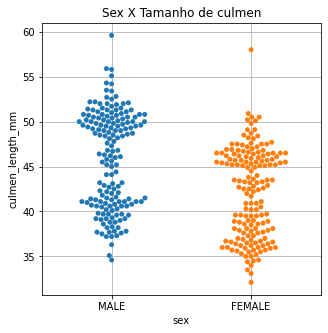

In [216]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='sex', y='culmen_length_mm', data=df3)
plt.title('Sex X Tamanho de culmen')
plt.grid()
plt.show()

**Conclusão:** Os pinguins machos tem maior tamanho de culmen.

In [217]:
# Média de tamanho do culmen por spacies
df3.groupby('species')['culmen_length_mm'].mean().round(2)

species
Adelie       38.82
Chinstrap    48.83
Gentoo       47.57
Name: culmen_length_mm, dtype: float64

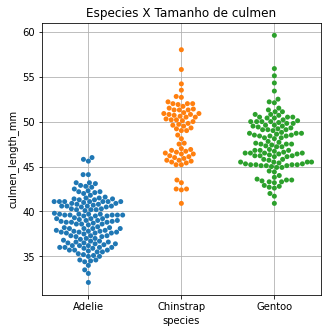

In [218]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='species', y='culmen_length_mm', data=df3)
plt.title('Especies X Tamanho de culmen')
plt.grid()
plt.show()

**Conclusão:** Os pinguins da especie Adelie tem o menor tamanho de culmem dos pesquisados.

In [219]:
# Média de tamanho do culmen por island
df3.groupby('island')['culmen_length_mm'].mean().round(2)

island
Biscoe       45.25
Dream        44.22
Torgersen    39.04
Name: culmen_length_mm, dtype: float64

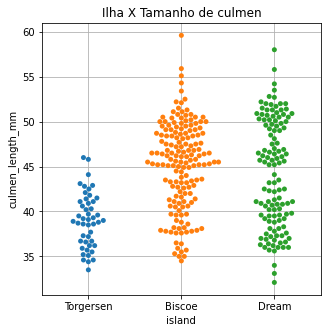

In [220]:
plt.figure(figsize=(5,5))
sns.swarmplot(x='island', y='culmen_length_mm', data=df3)
plt.title('Ilha X Tamanho de culmen')
plt.grid()
plt.show()

In [221]:
df3.head(0)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


**Avaliação de três variaveis simultanea**

In [222]:
# Contagem de especie por sexo por ilha
df_ilha_sexo_especies = df3.groupby(['island','sex', 'species']).size().reset_index(name='Count')
df_ilha_sexo_especies

,island,sex,species,Count
0,Biscoe,FEMALE,Adelie,22
1,Biscoe,FEMALE,Gentoo,58
2,Biscoe,MALE,Adelie,22
3,Biscoe,MALE,Gentoo,61
4,Dream,FEMALE,Adelie,27
5,Dream,FEMALE,Chinstrap,34
6,Dream,MALE,Adelie,28
7,Dream,MALE,Chinstrap,34
8,Torgersen,FEMALE,Adelie,24
9,Torgersen,MALE,Adelie,23


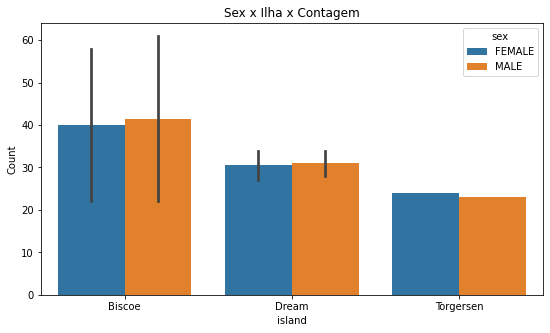

In [223]:
# Gráfico
plt.figure(figsize=(9,5))
sns.barplot(x="island", y="Count", hue="sex", data=df_ilha_sexo_especies)
plt.title('Sex x Ilha x Contagem')
plt.show()

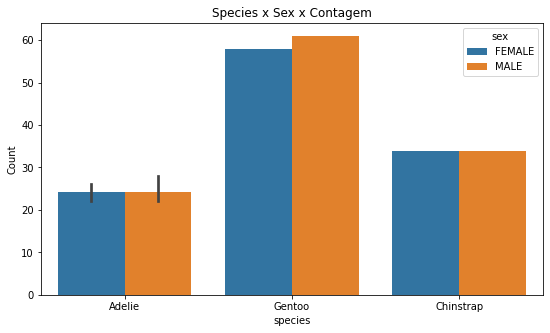

In [224]:
# Gráfico
plt.figure(figsize=(9,5))
sns.barplot(x="species", y="Count", hue="sex", data=df_ilha_sexo_especies)
plt.title('Species x Sex x Contagem')
plt.show()

In [225]:
# Media da massa corporal por species e sexo
df_mc_epecies_sexo = df3.groupby(['species','sex'])['body_mass_g'].mean().round(2).reset_index(name='media de peso')
df_mc_epecies_sexo

,species,sex,media de peso
0,Adelie,FEMALE,3368.84
1,Adelie,MALE,4043.49
2,Chinstrap,FEMALE,3527.21
3,Chinstrap,MALE,3938.97
4,Gentoo,FEMALE,4679.74
5,Gentoo,MALE,5484.84


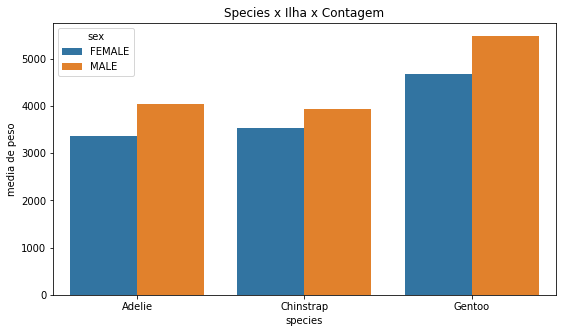

In [226]:
# Gráfico
plt.figure(figsize=(9,5))
sns.barplot(x="species", y="media de peso", hue="sex", data=df_mc_epecies_sexo)
plt.title('Species x Ilha x Contagem')
plt.show()

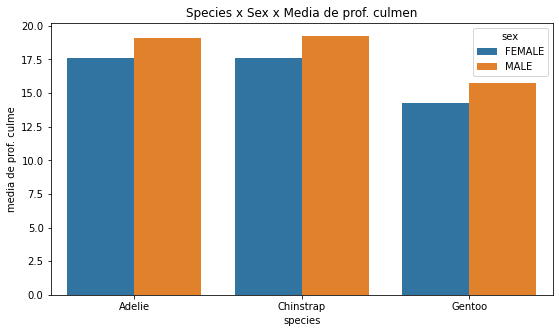

In [227]:
# Gráfico
plt.figure(figsize=(9,5))
sns.barplot(x="species", y="media de prof. culme", hue="sex", data=df_especie_sexo_culmend)
plt.title('Species x Sex x Media de prof. culmen')
plt.show()

In [228]:
df_especie_sexo_culmenl = df3.groupby(['species','sex'])['culmen_length_mm'].mean().round(2).reset_index(name='media de tam. culme')
df_especie_sexo_culmenl

,species,sex,media de tam. culme
0,Adelie,FEMALE,37.26
1,Adelie,MALE,40.39
2,Chinstrap,FEMALE,46.57
3,Chinstrap,MALE,51.09
4,Gentoo,FEMALE,45.56
5,Gentoo,MALE,49.47


In [229]:
df_ilha_espeies_sex = df3.groupby(['island','species','sex']).size().reset_index(name='Count')
df_ilha_espeies_sex

,island,species,sex,Count
0,Biscoe,Adelie,FEMALE,22
1,Biscoe,Adelie,MALE,22
2,Biscoe,Gentoo,FEMALE,58
3,Biscoe,Gentoo,MALE,61
4,Dream,Adelie,FEMALE,27
5,Dream,Adelie,MALE,28
6,Dream,Chinstrap,FEMALE,34
7,Dream,Chinstrap,MALE,34
8,Torgersen,Adelie,FEMALE,24
9,Torgersen,Adelie,MALE,23


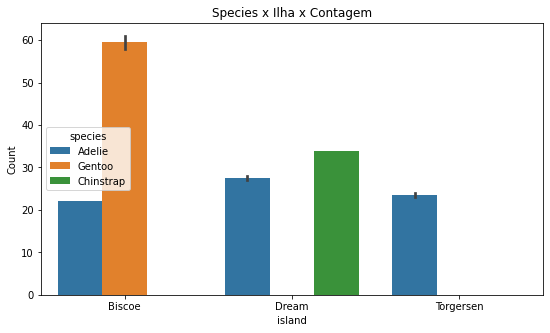

In [230]:
# Gráfico
plt.figure(figsize=(9,5))
sns.barplot(x="island", y="Count", hue="species", data=df_ilha_espeies_sex)
plt.title('Species x Ilha x Contagem')
plt.show()

In [231]:
df3.groupby(['island','species']).size().round(2)

island     species  
Biscoe     Adelie        44
           Gentoo       119
Dream      Adelie        55
           Chinstrap     68
Torgersen  Adelie        47
dtype: int64

**Conclusão:** Os pinguins da especie Gentoo so vivem na ilha Biscoe;

Os pinguins da especie Chinstrap so vivem na ilha Dream island;

Os pinguins da especie Adelie vivem em todas.

### **Analisando a distribuição de cada variavel** 

##### Analisando a variavel especies

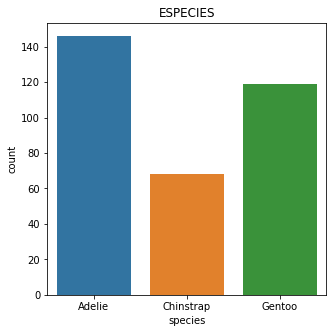

In [232]:
plt.figure(figsize=(5,5))
sns.countplot(df3.species)
plt.title('ESPECIES')
plt.show()

##### Analisando a variavel ISLAND

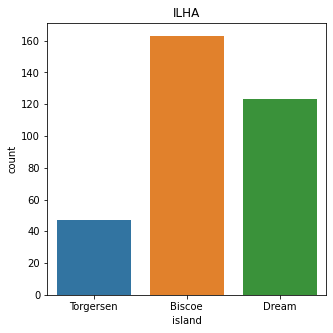

In [233]:
plt.figure(figsize=(5,5))
sns.countplot(df3.island)
plt.title('ILHA')
plt.show()

##### Analisando a variavel sex

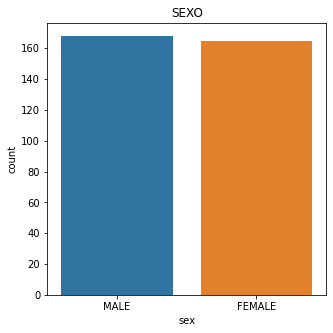

In [234]:
plt.figure(figsize=(5,5))
sns.countplot(df3.sex)
plt.title('SEXO')
plt.show()